In [ ]:

#Load Dataset
import pandas as pd

# Load the dataset
file_path = 'WineQT.csv'  # Replace with your actual file path
wine_data = pd.read_csv('WineQT.csv')

# Display the first few rows of the dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
#Check for Missing Values
print(wine_data.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:

# Get basic statistics of the dataset
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

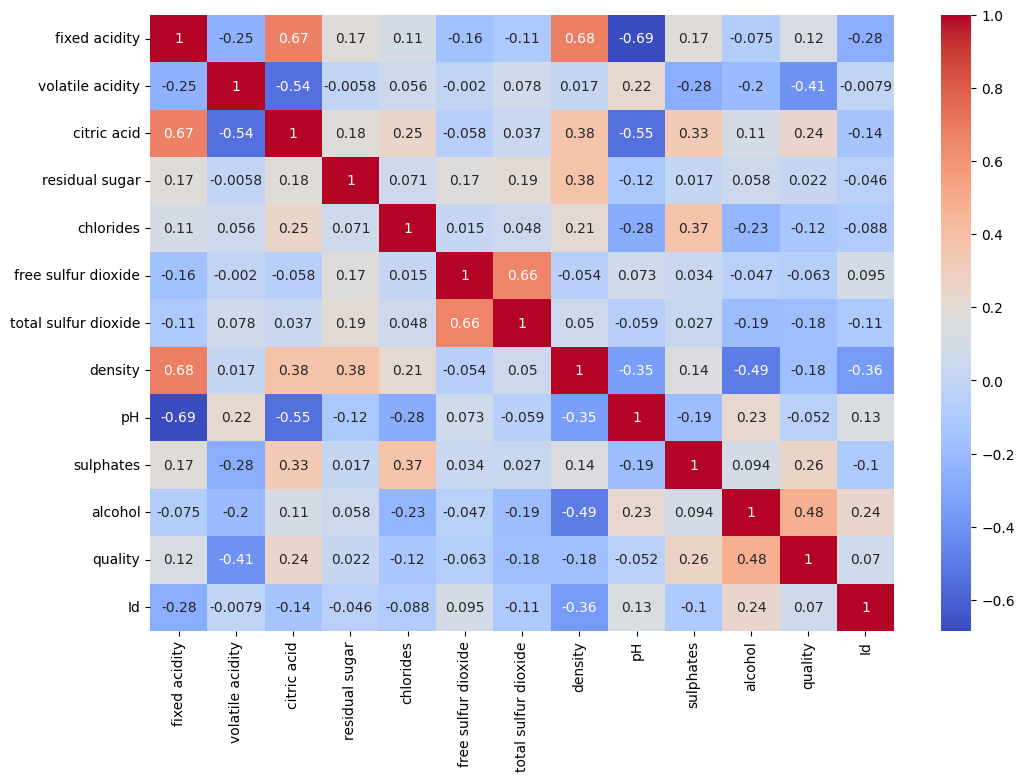

In [ ]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = wine_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split

# Define features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 914
Testing set size: 229


In [ ]:
#Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Initialize models
rf = RandomForestClassifier()
sgd = SGDClassifier()
svc = SVC()

# Train models
rf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)

print("Models trained successfully!")



Models trained successfully!


In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report

# Predict and evaluate Random Forest
rf_preds = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Predict and evaluate SGD
sgd_preds = sgd.predict(X_test)
print("SGD Classification Report:\n", classification_report(y_test, sgd_preds))

# Predict and evaluate SVC
svc_preds = svc.predict(X_test)
print("SVC Classification Report:\n", classification_report(y_test, svc_preds))


Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.76      0.73        96
           6       0.63      0.67      0.65        99
           7       0.68      0.58      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.41      0.40      0.40       229
weighted avg       0.65      0.67      0.66       229

SGD Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.41      0.93      0.57        96
           6       0.42      0.05      0.09        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.41       229
   macro avg       0.17      0.20      0.13       229
weighted av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

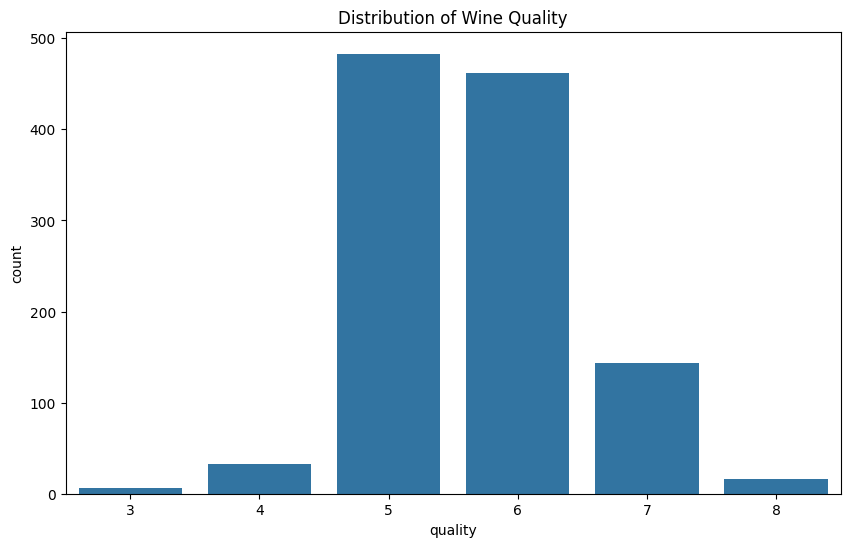

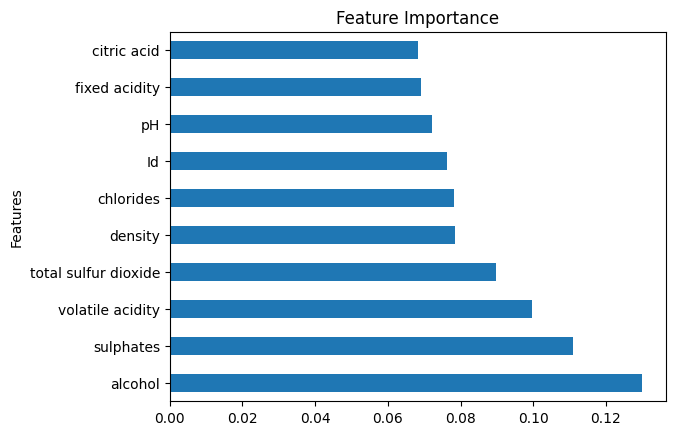

In [ ]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

# Example: Visualizing the feature importance from Random Forest
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.ylabel('Features')
plt.show()
